In [1]:
import pandas as pd
nutrition = pd.read_csv("../Data Cleaning/Nutrition.csv")
print("letter recognition loaded")
print("Shape of the letter recognition dataset", nutrition.shape)
print("Dataset info", nutrition.info())

letter recognition loaded
Shape of the letter recognition dataset (106260, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   106260 non-null  int64  
 1   YearEnd                     106260 non-null  int64  
 2   LocationAbbr                106260 non-null  object 
 3   LocationDesc                106260 non-null  object 
 4   Datasource                  106260 non-null  object 
 5   Class                       106260 non-null  object 
 6   Topic                       106260 non-null  object 
 7   Question                    106260 non-null  object 
 8   Data_Value_Unit             0 non-null       float64
 9   Data_Value_Type             106260 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float6

In [2]:
nutrition.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$15,000 - $24,999",INC,INC1525
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$25,000 - $34,999",INC,INC2535
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$35,000 - $49,999",INC,INC3550
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$50,000 - $74,999",INC,INC5075
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Income,"$75,000 or greater",INC,INC75PLUS


In [3]:
#Remove the hidden spaces or invisible characters from column names.

nutrition.columns = nutrition.columns.str.strip()

# List of unwanted columns
columns_remove= [
    "YearEnd",
     "Datasource",
    "Data_Value_Unit",
    "Data_Value_Alt",
     "Data_Value_Footnote_Symbol",
    "Data_Value_Footnote",
    "Data_Value_Type",
    "Total",
     "ClassID",
    "TopicID",
    "QuestionID",
     "DataValueTypeID",
    "LocationID",
    "StratificationCategoryId1",
    "StratificationID1",
]

# Droping the unwanted columns
nutrition = nutrition.drop(columns = columns_remove, errors = "ignore")
nutrition.head(1)
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106260 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   YearStart                106260 non-null  int64  
 1   LocationAbbr             106260 non-null  object 
 2   LocationDesc             106260 non-null  object 
 3   Class                    106260 non-null  object 
 4   Topic                    106260 non-null  object 
 5   Question                 106260 non-null  object 
 6   Data_Value               93505 non-null   float64
 7   Low_Confidence_Limit     93505 non-null   float64
 8   High_Confidence_Limit    93505 non-null   float64
 9   Sample_Size              93505 non-null   float64
 10  Age(years)               22770 non-null   object 
 11  Education                15180 non-null   object 
 12  Sex                      7590 non-null    object 
 13  Income                   26565 non-null   object 
 14  Race

In [4]:
# Removing the duplicates
duplicate_data = nutrition.duplicated().sum()
nutrition = nutrition.drop_duplicates()
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                 12755
Low_Confidence_Limit       12755
High_Confidence_Limit      12755
Sample_Size                12755
Age(years)                 83490
Education                  91080
Sex                        98670
Income                     79695
Race/Ethnicity             75900
GeoLocation                 1932
StratificationCategory1        0
Stratification1                0
dtype: int64

In [5]:
# Dropping null datavalue
nutrition = nutrition.dropna(subset=["Data_Value"])
nutrition.shape

(93505, 18)

In [6]:
# checking remaining null values. Socio-demographic fields are missing. but it is not error. It only exist for that stratification
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1                0
dtype: int64

In [7]:
# Standardizing missing entries
nutrition = nutrition.replace(r'^\s*$',pd.NA,regex=True)
nutrition.head(1)

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"


In [8]:
nutrition.isna().sum()
#checking the data types
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [9]:
# Handling the categorical columns consistency
for column in ["Class","Topic","StratificationCategory1","Stratification1","LocationDesc",]:
    print(f"\nTotal unique values count in '{column}':{nutrition[column].nunique()}")
    print(f"\n Unique values in  {column}:{nutrition[column].unique()}")


Total unique values count in 'Class':3

 Unique values in  Class:['Obesity / Weight Status' 'Physical Activity' 'Fruits and Vegetables']

Total unique values count in 'Topic':3

 Unique values in  Topic:['Obesity / Weight Status' 'Physical Activity - Behavior'
 'Fruits and Vegetables - Behavior']

Total unique values count in 'StratificationCategory1':6

 Unique values in  StratificationCategory1:['Income' 'Age (years)' 'Race/Ethnicity' 'Education' 'Sex' 'Total']

Total unique values count in 'Stratification1':28

 Unique values in  Stratification1:['$15,000 - $24,999' '$25,000 - $34,999' '$35,000 - $49,999'
 '$50,000 - $74,999' '$75,000 or greater' '18 - 24' '2 or more races'
 '25 - 34' '35 - 44' '45 - 54' '55 - 64' '65 or older'
 'American Indian/Alaska Native' 'College graduate' 'Data not reported'
 'Female' 'High school graduate' 'Hispanic' 'Less than $15,000'
 'Less than high school' 'Male' 'Non-Hispanic Black' 'Non-Hispanic White'
 'Some college or technical school' 'Total' 'Oth

In [10]:
# Unique values in  Stratification1 contain "Data not reported"
#Count of data  not reported
import numpy as np 
count_data_not_reported = (nutrition["Stratification1"] == "Data not reported").sum()
nutrition["Stratification1"].value_counts()
nutrition["Stratification1"] = nutrition["Stratification1"].replace("Data not reported",np.nan)

In [11]:
#cleaned data 
cleaned_data= nutrition
cleaned_data

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106255,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,33.2,28.9,37.8,1347.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
106256,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,20.5,14.0,29.1,237.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
106257,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,23.7,10.6,44.7,68.0,NaN,NaN,NaN,NaN,Other,"(18.335765, -64.896335)",Race/Ethnicity,Other
106258,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,28.1,20.5,37.2,397.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [12]:
nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 106259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationAbbr             93505 non-null  object 
 2   LocationDesc             93505 non-null  object 
 3   Class                    93505 non-null  object 
 4   Topic                    93505 non-null  object 
 5   Question                 93505 non-null  object 
 6   Data_Value               93505 non-null  float64
 7   Low_Confidence_Limit     93505 non-null  float64
 8   High_Confidence_Limit    93505 non-null  float64
 9   Sample_Size              93505 non-null  float64
 10  Age(years)               22104 non-null  object 
 11  Education                14736 non-null  object 
 12  Sex                      7368 non-null   object 
 13  Income                   25783 non-null  object 
 14  Race/Ethnicity           1

In [13]:
nutrition.isna().sum()

YearStart                      0
LocationAbbr                   0
LocationDesc                   0
Class                          0
Topic                          0
Question                       0
Data_Value                     0
Low_Confidence_Limit           0
High_Confidence_Limit          0
Sample_Size                    0
Age(years)                 71401
Education                  78769
Sex                        86137
Income                     67722
Race/Ethnicity             73675
GeoLocation                 1929
StratificationCategory1        0
Stratification1             3684
dtype: int64

In [14]:
# Research question 1:
# How does fruit and vegetable consumption per day relate to BMI among U.S. adults?
nutrition

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106255,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,33.2,28.9,37.8,1347.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
106256,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,20.5,14.0,29.1,237.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
106257,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,23.7,10.6,44.7,68.0,NaN,NaN,NaN,NaN,Other,"(18.335765, -64.896335)",Race/Ethnicity,Other
106258,2023,VI,Virgin Islands,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,28.1,20.5,37.2,397.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [15]:
# Step 1: Seperate the datasets 
# why case is used
# ehy na is used
# filter the rows where the question includes fruits and vegetables
fruits_veg = nutrition[nutrition['Question'].str.contains('fruit|vegetables', case=False, na=False )]
fruits_veg

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
46200,2017,AL,Alabama,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,46.4,42.1,50.7,1002.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
46201,2017,AL,Alabama,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,46.2,40.2,52.4,518.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
46202,2017,AL,Alabama,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,45.5,40.6,50.5,708.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
46203,2017,AL,Alabama,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,42.7,38.1,47.5,723.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
46204,2017,AL,Alabama,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,39.5,35.9,43.3,1217.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86234,2021,VI,Virgin Islands,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,32.1,24.9,40.3,528.0,NaN,NaN,Male,NaN,NaN,"(18.335765, -64.896335)",Sex,Male
86235,2021,VI,Virgin Islands,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,35.2,25.9,45.8,686.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
86236,2021,VI,Virgin Islands,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,15.6,5.9,35.0,168.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
86238,2021,VI,Virgin Islands,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,32.8,21.5,46.5,218.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [16]:
# Filter the topic column because the BMI is not always written in thw question
bmi = nutrition[nutrition['Topic'].str.contains('Obesity', case=False, na=False)]
bmi

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Sex,Income,Race/Ethnicity,GeoLocation,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.8,31.3,38.5,1367.0,NaN,NaN,NaN,"$15,000 - $24,999",NaN,"(32.840571122, -86.631860762)",Income,"$15,000 - $24,999"
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.8,31.1,40.8,757.0,NaN,NaN,NaN,"$25,000 - $34,999",NaN,"(32.840571122, -86.631860762)",Income,"$25,000 - $34,999"
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,28.0,36.8,861.0,NaN,NaN,NaN,"$35,000 - $49,999",NaN,"(32.840571122, -86.631860762)",Income,"$35,000 - $49,999"
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.1,29.7,38.8,785.0,NaN,NaN,NaN,"$50,000 - $74,999",NaN,"(32.840571122, -86.631860762)",Income,"$50,000 - $74,999"
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.8,25.4,32.5,1125.0,NaN,NaN,NaN,"$75,000 or greater",NaN,"(32.840571122, -86.631860762)",Income,"$75,000 or greater"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98555,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,36.8,32.3,41.5,1226.0,NaN,NaN,NaN,NaN,Non-Hispanic Black,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic Black
98556,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,43.2,33.1,53.9,225.0,NaN,NaN,NaN,NaN,Non-Hispanic White,"(18.335765, -64.896335)",Race/Ethnicity,Non-Hispanic White
98557,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.5,18.1,63.9,61.0,NaN,NaN,NaN,NaN,Other,"(18.335765, -64.896335)",Race/Ethnicity,Other
98558,2023,VI,Virgin Islands,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.1,31.2,49.6,373.0,NaN,Some college or technical sch,NaN,NaN,NaN,"(18.335765, -64.896335)",Education,Some college or technical school


In [17]:
#Step 2 : Combine the two datasets
# 1. Take average for the two datasets as per state
fruit_state = (
    fruits_veg
    .groupby('LocationDesc')['Data_Value']
    .mean()
    .reset_index()
    .rename(columns={'Data_Value': 'FruitVeg'})
)

fruit_state

,LocationDesc,FruitVeg
0,Alabama,33.354054
1,Alaska,31.188000
2,Arizona,30.729630
3,Arkansas,33.674834
4,California,29.411875
5,Colorado,28.969375
6,Connecticut,27.967308
7,Delaware,29.442568
8,District of Columbia,25.953333
9,Florida,28.413889


In [18]:
bmi_state = (
    bmi
    .groupby('LocationDesc')['Data_Value']
    .mean()
    .reset_index()
    .rename(columns={'Data_Value': 'BMI_Obesity'})  
)
bmi_state

,LocationDesc,BMI_Obesity
0,Alabama,34.821672
1,Alaska,32.871450
2,Arizona,32.319684
3,Arkansas,34.704601
4,California,31.068876
5,Colorado,29.163649
6,Connecticut,31.833580
7,Delaware,33.467130
8,District of Columbia,27.877676
9,Florida,31.562226


In [19]:
# Step 3: Merge the two states
# why are we using locationdesc
merge = fruit_state.merge(bmi_state, on='LocationDesc', how='inner')
merge

,LocationDesc,FruitVeg,BMI_Obesity
0,Alabama,33.354054,34.821672
1,Alaska,31.188000,32.871450
2,Arizona,30.729630,32.319684
3,Arkansas,33.674834,34.704601
4,California,29.411875,31.068876
5,Colorado,28.969375,29.163649
6,Connecticut,27.967308,31.833580
7,Delaware,29.442568,33.467130
8,District of Columbia,25.953333,27.877676
9,Florida,28.413889,31.562226


In [20]:
# Checking the number of rows after the merge
merge.shape


(55, 3)

In [21]:
# Checking the null values 
merge.isna().sum()

LocationDesc    0
FruitVeg        0
BMI_Obesity     0
dtype: int64

In [22]:
# Checking the columns
merge.columns

Index(['LocationDesc', 'FruitVeg', 'BMI_Obesity'], dtype='object')

In [23]:
# Correlation
merge[['FruitVeg', 'BMI_Obesity']].corr()

,FruitVeg,BMI_Obesity
FruitVeg,1.000000,0.553703
BMI_Obesity,0.553703,1.000000


In [24]:
# Step 4: Adding more columns for doing the muliple linear regression
merge['Sex_encoded'] = nutrition['Sex'].map({'Male':0, 'Female':1})
merge['Age_numeric'] = nutrition['Age(years)'].str.extract(r'(\d+)').astype(float)





In [25]:
merge[['FruitVeg', 'Age_numeric', 'Sex_encoded', 'BMI_Obesity']].isna().sum()

FruitVeg        0
Age_numeric    43
Sex_encoded    51
BMI_Obesity     0
dtype: int64

In [26]:
# Multiple Linear Regression
import pandas as pd
import statsmodels.api as sm

# Fill missing Age with the mean
merge['Age_numeric'] = merge['Age_numeric'].fillna(merge['Age_numeric'].mean())

# Fill missing Sex with the mode
merge['Sex_encoded'] = merge['Sex_encoded'].fillna(merge['Sex_encoded'].mode()[0])

X = merge[['FruitVeg', 'Age_numeric', 'Sex_encoded']]
y = merge['BMI_Obesity']

#intercepts
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            BMI_Obesity   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     8.413
Date:                Wed, 19 Nov 2025   Prob (F-statistic):           0.000122
Time:                        05:34:20   Log-Likelihood:                -89.907
No. Observations:                  55   AIC:                             187.8
Df Residuals:                      51   BIC:                             195.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          25.1931      1.680     14.997      

In [27]:
# # Visulaisation
# # import matplotlib.pyplot as plt
# # import seaborn as sns 
# # impor

# import matplotlib.pyplot as plt
# import seaborn as sns
# import statsmodels.api as sm

# # Predict BMI using your fitted model
# X_plot = merge[['FruitVeg', 'Age_numeric', 'Sex_encoded']]
# X_plot = sm.add_constant(X_plot)
# y_pred = model.predict(X_plot)

# # Scatter plot of FruitVeg vs BMI
# plt.figure(figsize=(10,6))
# sns.scatterplot(data=merge, x='FruitVeg', y='BMI_Obesity', hue='Sex_encoded', palette=['blue','red'], s=80)

# # Regression line based on multiple linear regression
# plt.plot(merge['FruitVeg'], y_pred, color='green', linewidth=2, label='MLR prediction')

# plt.xlabel('Average Fruit & Vegetable Intake')
# plt.ylabel('BMI / Obesity Rate')
# plt.title('Multiple Linear Regression: BMI vs Fruit & Vegetable Intake')
# plt.legend(title='Sex (0=Male, 1=Female)')
# plt.show()



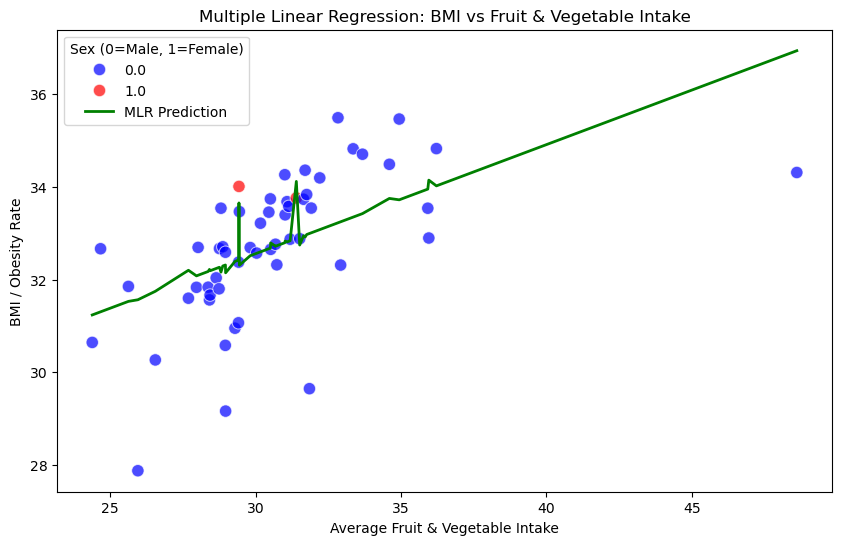

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Sort the data for proper line plotting
merge_sorted = merge.sort_values('FruitVeg')

# Use the same X values for prediction (sorted)
X_sorted = sm.add_constant(merge_sorted[['FruitVeg', 'Age_numeric', 'Sex_encoded']])
y_pred_sorted = model.predict(X_sorted)

# Simple corrected plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=merge_sorted, x='FruitVeg', y='BMI_Obesity', 
               hue='Sex_encoded', palette=['blue','red'], s=80, alpha=0.7)

# Now the line will be properly connected
plt.plot(merge_sorted['FruitVeg'], y_pred_sorted, color='green', linewidth=2, 
         label='MLR Prediction')

plt.xlabel('Average Fruit & Vegetable Intake')
plt.ylabel('BMI / Obesity Rate')
plt.title('Multiple Linear Regression: BMI vs Fruit & Vegetable Intake')
plt.legend(title='Sex (0=Male, 1=Female)')
plt.show()

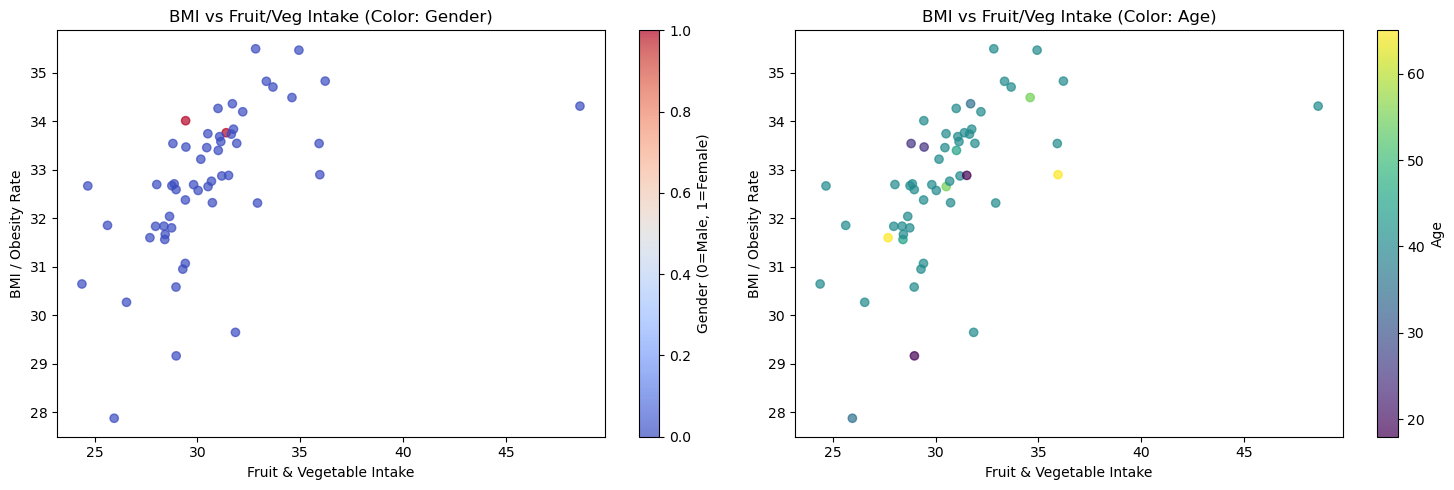

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Colored by Gender
scatter1 = ax1.scatter(merge['FruitVeg'], merge['BMI_Obesity'], 
                      c=merge['Sex_encoded'], cmap='coolwarm', alpha=0.7)
ax1.set_xlabel('Fruit & Vegetable Intake')
ax1.set_ylabel('BMI / Obesity Rate')
ax1.set_title('BMI vs Fruit/Veg Intake (Color: Gender)')
plt.colorbar(scatter1, ax=ax1, label='Gender (0=Male, 1=Female)')

# Plot 2: Colored by Age
scatter2 = ax2.scatter(merge['FruitVeg'], merge['BMI_Obesity'], 
                      c=merge['Age_numeric'], cmap='viridis', alpha=0.7)
ax2.set_xlabel('Fruit & Vegetable Intake')
ax2.set_ylabel('BMI / Obesity Rate')
ax2.set_title('BMI vs Fruit/Veg Intake (Color: Age)')
plt.colorbar(scatter2, ax=ax2, label='Age')

plt.tight_layout()
plt.show()